In [ ]:
import os
import io
import cv2
from PIL import Image
from rembg import remove
from concurrent.futures import ThreadPoolExecutor

video_folder = r'D:\Download\computer_vision_port_1_excercise_1\image_data\input_video'
intermediate_root = r'D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames'
target_size = (400, 400)

frame_interval = 6
os.makedirs(intermediate_root, exist_ok=True)

def extract_frames_from_video(video_path, intermediate_folder):
    os.makedirs(intermediate_folder, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    # get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps

    # display video metadata
    print(f"\nProcessing: {os.path.basename(video_path)}")
    print(f"FPS: {fps}, Total Frames: {total_frames}, Duration: {duration:.2f} sec")

    frame_count = 0
    saved_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # save frame every 'frame_interval' frames
        if frame_count % frame_interval == 0:
            # Resize the frame
            resized = cv2.resize(frame, target_size)
            # Rotate the frame 90 degrees counter-clockwise
            rotated = cv2.rotate(resized, cv2.ROTATE_90_COUNTERCLOCKWISE)
            # Create output filename and save the frame
            filename = os.path.join(intermediate_folder, f"frame_{saved_count:04d}.png")
            cv2.imwrite(filename, rotated)
            print(f"Saved frame: {filename}")
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"✅ Saved {saved_count} frames from {os.path.basename(video_path)}")

if __name__ == "__main__":
    video_files = [f for f in os.listdir(video_folder) if f.lower().endswith(('.mp4', '.avi', '.mov'))]

    for video_name in video_files:
        video_path = os.path.join(video_folder, video_name)
        base_name = os.path.splitext(video_name)[0] 

        intermediate_folder = os.path.join(intermediate_root, base_name)
        extract_frames_from_video(video_path, intermediate_folder)

    print("\n🎉 All videos processed successfully!")


Processing: both_toy.mp4
FPS: 29.60525188640203, Total Frames: 864, Duration: 29.18 sec
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0000.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0001.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0002.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0003.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0004.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0005.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0006.png
Saved frame: D:\Download\computer_vision_port_1_excercise_1\image_data\created_frames\both_toy\frame_0007.png
Saved frame: D:\Download\comput

C:\Users\Mr SUN\AppData\Local\Temp\ipykernel_11296\3059545570.py:28: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


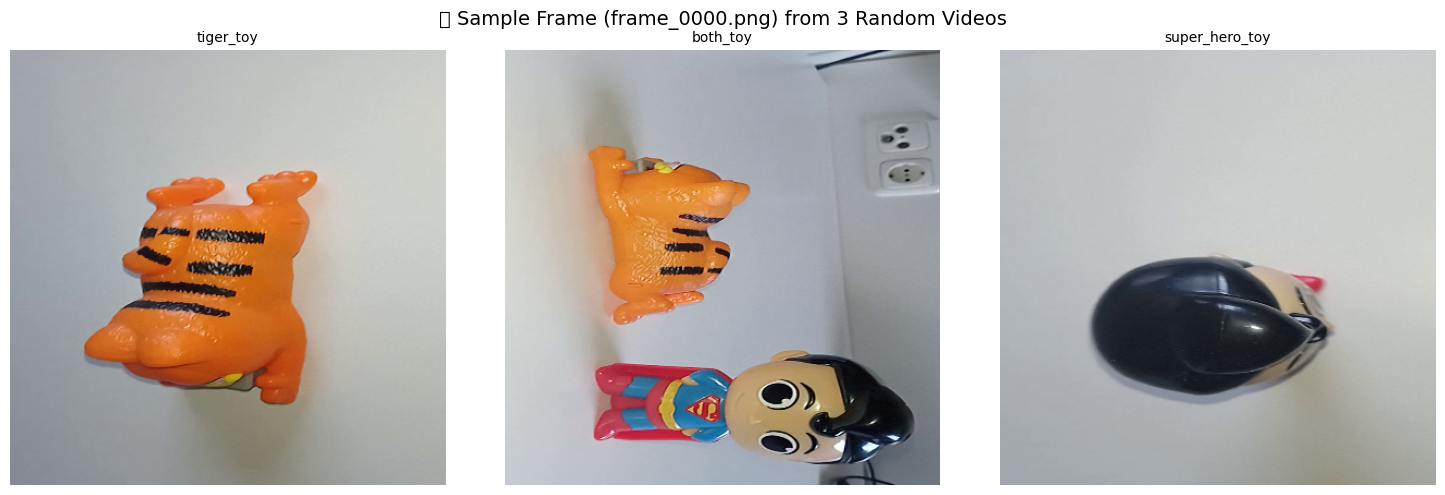

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

selected_videos = random.sample(video_files, min(3, len(video_files)))
fig, axs = plt.subplots(1, len(selected_videos), figsize=(15, 5))

for i, video_name in enumerate(selected_videos):
    base_name = os.path.splitext(video_name)[0]
    folder_path = os.path.join(intermediate_root, base_name)
    frame_path = os.path.join(folder_path, "frame_0000.png")

    if os.path.exists(frame_path):
        img = mpimg.imread(frame_path)
        axs[i].imshow(img)
        axs[i].set_title(base_name, fontsize=10)
        axs[i].axis('off')
    else:
        axs[i].text(0.5, 0.5, 'Frame not found', horizontalalignment='center', verticalalignment='center')
        axs[i].set_title(base_name, fontsize=10)
        axs[i].axis('off')

plt.suptitle("📸 Sample Frame (frame_0000.png) from 3 Random Videos", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [ ]:
from ultralytics import YOLO
import shutil
import os
import zipfile
from IPython.display import FileLink
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import imageio
import cv2
import random

model = YOLO("yolov8m.pt")

model.train(
    data="/kaggle/input/object-detection/data.yaml",  
    epochs=100,
    imgsz=640,
    batch=16,
    save=True,
    name='yolov8m_custom',  
    verbose=True 
)

best_model_path = "/kaggle/working/runs/detect/yolov8m_custom/weights/best.pt"
shutil.copy(best_model_path, "/kaggle/working/best.pt")

model.predict(
    source="/kaggle/input/object-detection/testing_video.mp4",  
    save=True,                
    save_txt=False,           
    conf=0.25,                
    iou=0.45,                 
    show=True,         
    verbose=True 
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 241MB/s]


Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/object-detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8m_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 31.8±5.7 MB/s, size: 138.8 KB)


train: Scanning /kaggle/input/object-detection/train/labels... 178 images, 0 backgrounds, 0 corrupt: 100%|██████████| 178/178 [00:00<00:00, 276.65it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/object-detection/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 35.0±2.6 MB/s, size: 145.3 KB)


val: Scanning /kaggle/input/object-detection/val/labels... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 276.11it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/object-detection/val is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8m_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.12G     0.8022      2.773      1.325          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         51         61      0.813      0.902      0.932      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.27G     0.7175      1.174      1.213          2        640: 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         51         61      0.956       0.95      0.947      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.28G     0.8759      1.239       1.27          3        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         51         61      0.324      0.391      0.284      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.28G     0.8417     0.9906      1.222          6        640: 100%|██████████| 12/12 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         51         61      0.207      0.562      0.125     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.28G     0.9173      1.003       1.28          5        640: 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         51         61     0.0449      0.818     0.0514     0.0199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.28G     0.9863     0.9218      1.293          3        640: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         51         61     0.0257      0.619     0.0277    0.00712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.28G     0.9955      1.109      1.334          7        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         51         61    0.00908      0.546       0.01    0.00233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.28G     0.9585      1.014      1.324          3        640: 100%|██████████| 12/12 [00:05<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         51         61     0.0101        0.3     0.0106    0.00307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.28G      1.154      1.364       1.59          2        640: 100%|██████████| 12/12 [00:05<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         51         61      0.183      0.466     0.0806     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.28G      1.014      1.081      1.394          2        640: 100%|██████████| 12/12 [00:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         51         61      0.585        0.5       0.12     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.28G     0.8886     0.8851       1.23          6        640: 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         51         61       0.44      0.681      0.569      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.28G     0.8969     0.9368      1.231          2        640: 100%|██████████| 12/12 [00:05<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         51         61      0.403      0.595      0.364      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.28G     0.9065     0.7029      1.298          4        640: 100%|██████████| 12/12 [00:05<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         51         61      0.691      0.934      0.783      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.28G     0.8796     0.7607      1.216          6        640: 100%|██████████| 12/12 [00:05<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         51         61      0.524      0.722      0.661      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.28G     0.8615     0.8425      1.207          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         51         61      0.456      0.618      0.533      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.28G     0.7474     0.6773      1.123          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         51         61      0.458       0.47      0.458      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.28G     0.8421     0.7269      1.209          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         51         61      0.484      0.227      0.314      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.28G      0.745     0.6474      1.165          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         51         61      0.434      0.558      0.516      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.28G     0.8934     0.7275      1.263          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         51         61      0.734      0.693      0.796      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.28G     0.8409      0.662      1.202          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         51         61      0.882       0.86      0.942      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.28G     0.7861      0.664      1.184          8        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         51         61      0.933      0.889      0.901      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.28G     0.7991     0.6372      1.182          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.952      0.979      0.993      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.28G      0.781     0.7589      1.233          3        640: 100%|██████████| 12/12 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         51         61      0.864      0.838      0.892      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.28G     0.7664     0.6406      1.193          5        640: 100%|██████████| 12/12 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         51         61      0.948          1      0.993      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.28G     0.7179     0.6231       1.14          4        640: 100%|██████████| 12/12 [00:07<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         51         61      0.839      0.899      0.894      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.28G     0.7437     0.6298      1.148          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.911          1      0.967       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.28G     0.7719     0.5567      1.169          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.994          1      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.28G      0.683     0.5537      1.098          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         51         61      0.875      0.876      0.958      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.28G     0.7552     0.5878      1.203          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.834      0.777      0.863      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.28G     0.6799     0.5405      1.121          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.963          1      0.991      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.28G     0.6407     0.5486      1.106          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.979          1      0.993      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.28G     0.6632     0.5251      1.106          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         51         61      0.995          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.28G     0.6762     0.5691      1.143          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.967          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.28G     0.7246     0.5228      1.156          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         51         61      0.963      0.967      0.991      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.28G     0.6563     0.5387      1.117          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         51         61      0.993      0.972      0.994      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.28G     0.6792     0.5984      1.128          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.994          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.28G     0.6738     0.5497      1.114          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.992          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.28G      0.587     0.4932      1.076          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.28G      0.631     0.4748      1.073          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.979          1      0.995      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.28G     0.6449      0.503      1.093          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.992          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.28G     0.5839     0.4699      1.052          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.994          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.28G     0.6473     0.4621      1.125          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.996          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.28G     0.6822     0.4932      1.123          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61       0.95          1       0.98      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.28G     0.6131     0.4734      1.068          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.988          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.28G     0.6268     0.4563      1.099          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.995          1      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.28G     0.6236     0.4909      1.062          8        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.998          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.28G     0.5825     0.4377       1.07          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61       0.98          1      0.995      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.28G     0.5827     0.4436      1.063          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.997          1      0.995       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.28G     0.6899     0.4654      1.143          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.996          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.28G     0.5651     0.4339       1.08          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.996          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.28G     0.5663      0.486      1.025          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.28G     0.5344     0.4028      1.045          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.981          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.28G     0.5857     0.4793      1.107          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.28G     0.6055     0.4328      1.059          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.997          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.28G     0.5426     0.4108       1.04          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.998          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.28G     0.6291     0.4008      1.117          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.998          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.28G     0.5984     0.4226      1.084          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.998          1      0.995      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.28G     0.6047     0.4241      1.095          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.996          1      0.995      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.28G     0.5672     0.4117      1.038          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.997          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.28G     0.5654      0.409       1.06          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.998          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.28G     0.5249     0.3916      1.045          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.997          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.28G     0.5494     0.3843      1.045          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.998          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.28G     0.5472     0.3897      1.047          9        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.997          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.28G     0.5422     0.3986      1.052          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.28G     0.5775      0.423      1.098          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.997          1      0.995       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.28G     0.5554     0.4023       1.04          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.998          1      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.28G     0.5808      0.402       1.07          8        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.997          1      0.995      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.28G     0.5731      0.396       1.04          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.28G     0.5618       0.38      1.069          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         51         61      0.998          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.28G      0.674     0.5081      1.143          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         51         61      0.997          1      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.28G     0.5797     0.5063      1.077          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         51         61      0.997          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.28G     0.5336     0.4015      1.042          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         51         61      0.998          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.28G     0.5557     0.4351      1.061          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.28G     0.5035     0.3743      1.037          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.28G     0.5301     0.3566       1.04          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         51         61      0.998          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.28G     0.5227     0.3808     0.9947          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.998          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.28G     0.5377     0.3644      1.051          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.998          1      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.28G     0.4971     0.3492      1.015          8        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.998          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.28G      0.504     0.3525       1.02          6        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.998          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.28G     0.4946      0.356      1.012          9        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         51         61      0.998          1      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.28G     0.5141     0.3527       1.05          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.997          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.28G     0.4849     0.3394      1.026          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         51         61      0.997          1      0.995      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.28G     0.4701     0.3279     0.9965          9        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.28G     0.4908     0.3528       1.01          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.28G     0.4619     0.3359     0.9759          8        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         51         61      0.998          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.28G     0.4931     0.3344      1.025          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.998          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.28G     0.4865     0.3505      1.032          5        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.998          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.28G     0.4408     0.3284     0.9991          4        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.998          1      0.995      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.28G     0.4955     0.3338       1.01          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.28G      0.441     0.3064     0.9976          7        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995      0.968


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.28G     0.3175     0.2449     0.9441          2        640: 100%|██████████| 12/12 [00:07<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         51         61      0.997          1      0.995      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.28G     0.2765     0.2109     0.8986          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         51         61      0.996          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.28G     0.2856     0.2244     0.9209          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.995          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.28G     0.2865     0.2059     0.9058          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.996          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.28G     0.2829     0.1954     0.9006          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         51         61      0.997          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.28G     0.2638     0.1875     0.8736          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.28G      0.284     0.2022     0.9031          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         51         61      0.997          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.28G     0.2716     0.1981     0.9021          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         51         61      0.997          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.28G     0.2493       0.18     0.8971          2        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         51         61      0.997          1      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.28G     0.2732     0.1858     0.8938          3        640: 100%|██████████| 12/12 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         51         61      0.998          1      0.995      0.977



100 epochs completed in 0.228 hours.
Optimizer stripped from runs/detect/yolov8m_custom/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_custom/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_custom/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


                   all         51         61      0.997          1      0.995       0.98
             tiger_toy         31         31      0.998          1      0.995      0.979
          superman_toy         30         30      0.997          1      0.995      0.981


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 13.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/yolov8m_custom
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/451) /kaggle/input/object-detection/testing_video.mp4: 384x640 1 superman_toy, 40.3ms
video 1/1 (frame 2/451) /kaggle/input/object-detection/testing_video.mp4: 384x640 1 superman_toy, 11.3ms
video 1/1 (frame 3/451) /kaggle/input/object-

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'tiger_toy', 1: 'superman_toy'}
 obb: None
 orig_img: array([[[173, 176, 174],
         [173, 176, 174],
         [173, 176, 174],
         ...,
         [147, 152, 150],
         [147, 152, 150],
         [147, 152, 150]],
 
        [[173, 176, 174],
         [173, 176, 174],
         [173, 176, 174],
         ...,
         [147, 152, 150],
         [147, 152, 150],
         [147, 152, 150]],
 
        [[173, 176, 174],
         [173, 176, 174],
         [173, 176, 174],
         ...,
         [147, 152, 150],
         [147, 152, 150],
         [147, 152, 150]],
 
        ...,
 
        [[124, 132, 129],
         [126, 134, 131],
         [125, 133, 130],
         ...,
         [199, 201, 194],
         [199, 201, 194],
         [201, 203, 196]],
 
        [[124, 132, 129],
         [126, 134, 131],
         [126, 134, 131],
         .

In [ ]:
# 6. zip the entire /kaggle/working directory
def zipdir(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

zip_output_path = "/kaggle/working/runs/working_dir_output.zip"
zipdir("/kaggle/working/runs/", zip_output_path)

# 7. Display download link
print("Download the entire /kaggle/working/ directory contents:")
display(FileLink(zip_output_path))

Download the entire /kaggle/working/ directory contents:


/kaggle/working/runs/working_dir_output.zip

In [ ]:
output_path = r"/kaggle/working/runs/detect/yolov8m_custom2/testing_video.avi"
def display_middle_300(video_path):
    reader = imageio.get_reader(video_path)
    total_frames = reader.count_frames()
    start_frame = max(0, total_frames // 2 - 150)

    fig = plt.figure(figsize=(6, 6), dpi=100)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.axis('off')

    mov = []
    for i, frame in enumerate(reader):
        if i < start_frame:
            continue
        if i >= start_frame + 300:
            break
        img = plt.imshow(frame, animated=True)
        plt.axis('off')
        mov.append([img])

    reader.close()

    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)
    plt.close()
    return anime

HTML(display_middle_300(output_path).to_html5_video())